In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.lines as lines
import mplhep as hep
import numpy as np
plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kshort_pn_4GeV_Jun9_ntuple/*.root")

In [3]:
hists = {}
hists["Target_kaone_hist"] = hist.Hist("TSP Pions",
                                hist.Cat("Ktype", "Type of Kaons"),      
                                hist.Bin("k", r"Pion Energy [MeV]", 40, 0, 3500),
                                hist.Bin("e", r"Electron Energy [MeV]", 40, 0, 1500),
                            )

In [4]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)

    target_kaon = ldmx_events["TSP_Kaon_dau1"]
    
    masks_id = {'Kshort': 310,
                'Klong': 130,
                'Kpm': 321,
               }
    masses = {'Kshort': 497.648,
              'Klong': 497.648,
              'Kpm': 493.677
             }
    
    def flat(x,axis=None):
        try:
            return ak.to_numpy(ak.flatten(x,axis=axis)) 
        except:
            return x
    
    for part,pmask in masks_id.items():
        lower_mask = (-1*((target_kaon.e)+0) <= (target_kaon.electrone))
        hists["Target_kaone_hist"].fill(Ktype= part,
                                     k= flat(target_kaon[lower_mask].e),
                                     e= flat(target_kaon[lower_mask].electrone),
                                    )
    ytestmask = ((-1.25*(target_kaon.e)+2500) <= (target_kaon.electrone))                              
    print('ytest mask',flat(target_kaon[ytestmask].e).shape)    
    print('actual size',flat(target_kaon.e).shape) 
    print('acceptance',100*flat((flat(target_kaon[ytestmask].e).shape)/(flat((flat(target_kaon.e).shape)))), '%')  
    return

In [5]:
nchunk = 0
for chunk in ldmx_dict:
    # I usually test my code in one chunck only
    #if nchunk >= 1: break
    nchunk += 1
    print('process', nchunk)
    ProcessChunk(chunk, hists)

process 1
ytest mask (17,)
actual size (474,)
acceptance [3.58649789] %
process 2
ytest mask (20,)
actual size (456,)
acceptance [4.38596491] %
process 3
ytest mask (20,)
actual size (423,)
acceptance [4.72813239] %
process 4
ytest mask (17,)
actual size (463,)
acceptance [3.67170626] %
process 5
ytest mask (22,)
actual size (505,)
acceptance [4.35643564] %
process 6
ytest mask (28,)
actual size (461,)
acceptance [6.07375271] %
process 7
ytest mask (20,)
actual size (450,)
acceptance [4.44444444] %
process 8
ytest mask (23,)
actual size (504,)
acceptance [4.56349206] %
process 9
ytest mask (9,)
actual size (513,)
acceptance [1.75438596] %
process 10
ytest mask (26,)
actual size (527,)
acceptance [4.93358634] %
process 11
ytest mask (18,)
actual size (444,)
acceptance [4.05405405] %
process 12
ytest mask (16,)
actual size (477,)
acceptance [3.35429769] %
process 13
ytest mask (21,)
actual size (460,)
acceptance [4.56521739] %
process 14
ytest mask (22,)
actual size (494,)
acceptance [4.

<Hist (Ktype,k,e) instance at 0x103a696d0>


Text(2500, 200, '5%')

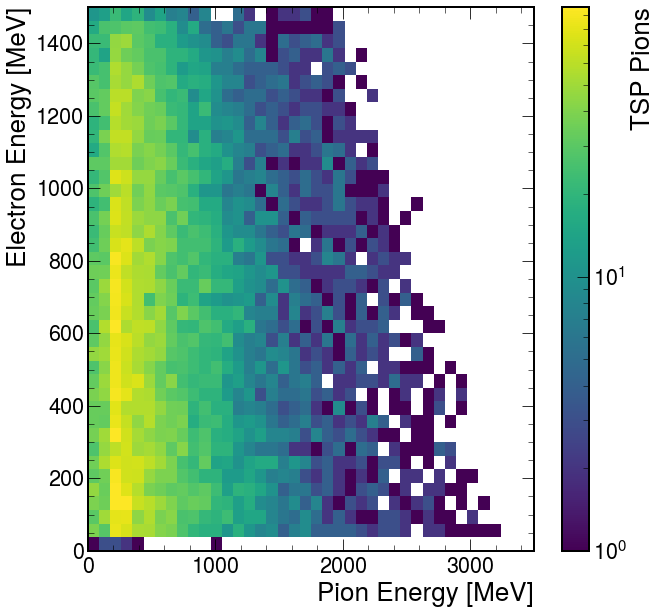

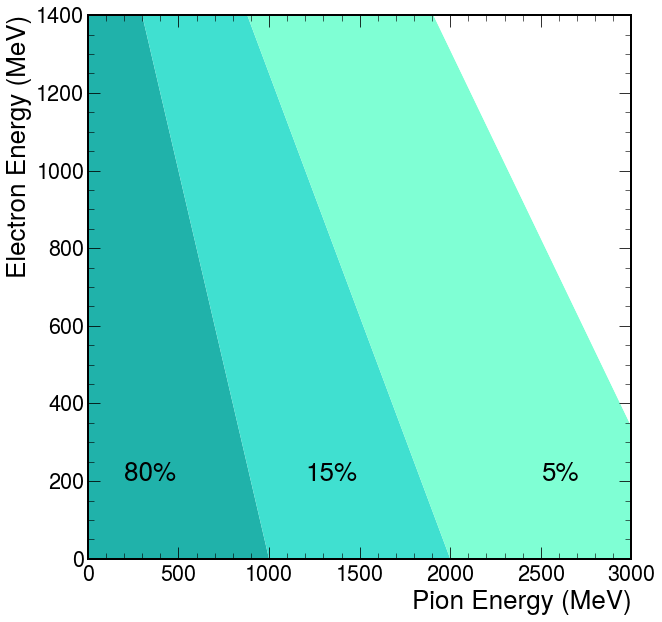

In [6]:
print(hists["Target_kaone_hist"])

fig, ax = plt.subplots()
hist.plot2d(hists["Target_kaone_hist"].integrate('Ktype', ['Kshort']), xaxis='k', ax=ax, patch_opts=POPTS);

fig, ax = plt.subplots()
ax.set_xlim(0, 3000)
ax.set_ylim(0, 1400)
ax.set_box_aspect(1)

x = np.arange(0, 3250, 1)
y0 = -x
y1 = -2.00* x + 2000
y2 = -1.25* x + 2500
y3 = -0.97* x + 3250
y4 = -1* x + 4000
#ytest = -2*x+2000
#ax.plot(x, ytest, '-')
ax.fill_between(x, y0, y1, where=(y1 > y0), facecolor='lightseagreen', alpha=1)
ax.fill_between(x, y1, y2, where=(y2 > y1), facecolor='turquoise', alpha=1)
ax.fill_between(x, y2, y3, where=(y3 > y2), facecolor='aquamarine', alpha=1)
ax.fill_between(x, y3, y4, where=(y4 > y3), facecolor='white', alpha=1)
ax.set_ylabel('Electron Energy (MeV)', loc='top')
ax.set_xlabel('Pion Energy (MeV)', loc='right')
ax.text(200, 200, '80%')
ax.text(1200, 200, '15%')
ax.text(2500, 200, '5%')


<Hist (Ktype,k,e) instance at 0x103a696d0>


Text(2500, 200, '5%')

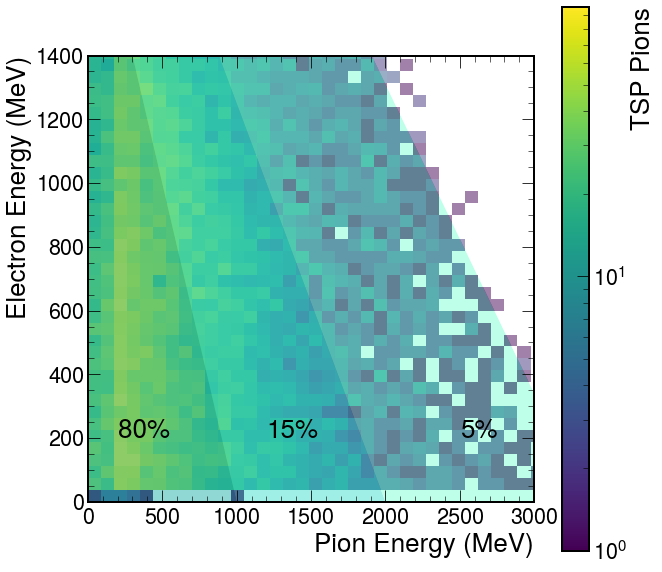

In [7]:
print(hists["Target_kaone_hist"])

fig, ax = plt.subplots()
hist.plot2d(hists["Target_kaone_hist"].integrate('Ktype', ['Kshort']), xaxis='k', ax=ax, patch_opts=POPTS);

ax.set_xlim(0, 3000)
ax.set_ylim(0, 1400)
ax.set_box_aspect(1)

x = np.arange(0, 3250, 1)
y0 = -x
y1 = -2.00* x + 2000
y2 = -1.25* x + 2500
y3 = -0.97* x + 3250
y4 = -1* x + 4000
#ytest = -2*x+2000
#ax.plot(x, ytest, '-')
ax.fill_between(x, y0, y1, where=(y1 > y0), facecolor='lightseagreen', alpha=0.5)
ax.fill_between(x, y1, y2, where=(y2 > y1), facecolor='turquoise', alpha=0.5)
ax.fill_between(x, y2, y3, where=(y3 > y2), facecolor='aquamarine', alpha=0.5)
ax.fill_between(x, y3, y4, where=(y4 > y3), facecolor='white', alpha=0.5)
ax.set_ylabel('Electron Energy (MeV)', loc='top')
ax.set_xlabel('Pion Energy (MeV)', loc='right')
ax.text(200, 200, '80%')
ax.text(1200, 200, '15%')
ax.text(2500, 200, '5%')

